# Plots

In [1]:
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ParseNHANES import ParseNHANES

In [2]:
nhanes = ParseNHANES(data_dir='data', out_dir='data')

In [3]:
df = nhanes.read_pkl('data/merged.pkl')
meta = nhanes.read_json('data/merged.JSON')

In [4]:
sns.choose_diverging_palette(as_cmap=False);

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

In [5]:
cmap = sns.diverging_palette(h_neg=0, h_pos=120, s=99, l=50, sep=50, center='light', as_cmap=True)

In [6]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool), k=1)

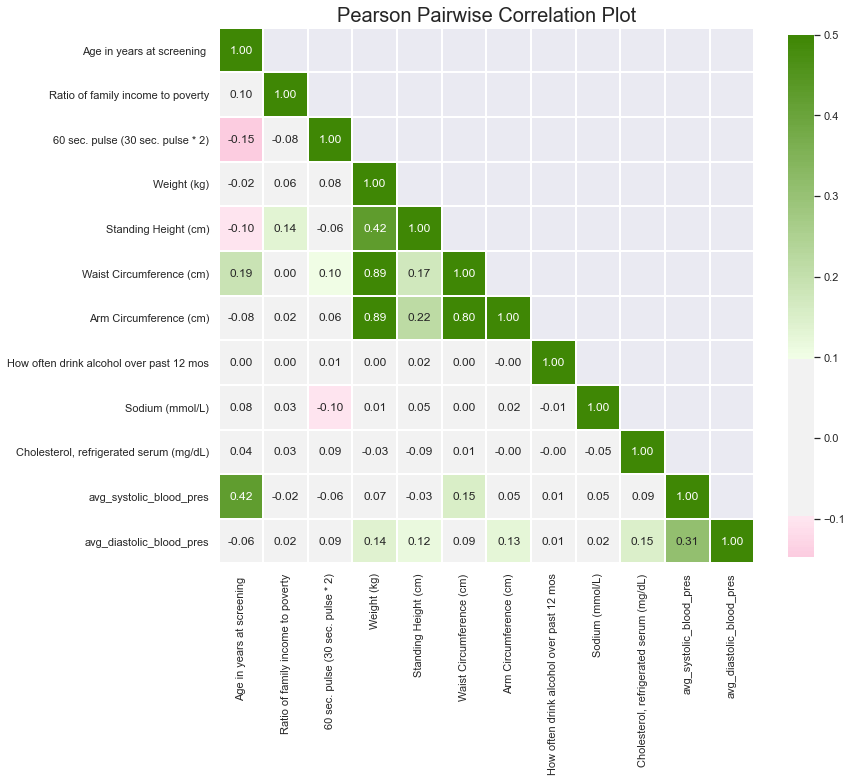

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title('Pearson Pairwise Correlation Plot', fontsize=20)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=0.5, square=True,
            linewidths=1, cbar_kws={'shrink': .8}, annot=True, fmt='.02f', ax=ax)

plt.show()

In [8]:
from ipywidgets import interactive

In [9]:
def dropdown_eventhandler(column):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_title(f"Histogram of: '{column}'", fontsize=20)
    
    if df[column].dtype == object:
        counts = df[column].value_counts()
        sns.barplot(counts.index, counts, ax=ax)
        ax.set_ylabel('Count')
    else:
        sns.distplot(df[column], ax=ax)
        ax.set_ylabel('Probability Density')
    
    plt.show(fig)

In [10]:
interactive(dropdown_eventhandler, column=df.columns)

interactive(children=(Dropdown(description='column', options=('Age in years at screening ', 'Race/Hispanic ori…